# Winning Strategies & Team Performance in IPL 2024

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('ipl_cleaned_data.csv')

## Team Performance & Winning Patterns 🏆
### 🎯 Objective:
Analyze which teams performed the best and their winning patterns in IPL 2024.

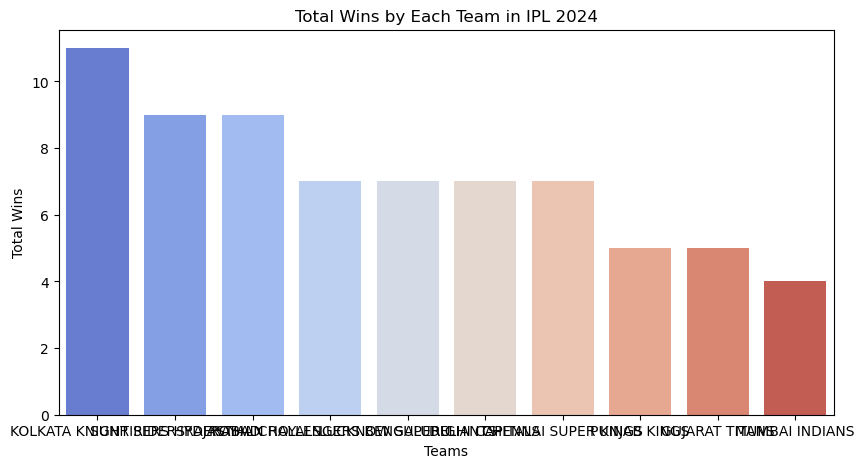

In [11]:
team_wins = df['winner'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values,palette='coolwarm',hue=team_wins.index)

plt.ylabel('Total Wins')
plt.xlabel('Teams')
plt.title('Total Wins by Each Team in IPL 2024')
plt.show()

### 📊 Key Findings:
- **KKR (Kolkata Knight Riders)** recorded the most wins in IPL 2024.
- Teams like **SRH (Sunrisers Hyderabad) and RR (Rajasthan Royals)** consistently dominated, while **Pk (Punjab Kings), GT (Gujarat Titans), and MI (Mumbai Indians)** had fewer wins.
____________________________________________________________________

## Winning by Runs vs Wickets

### 🎯 Objective:
Analyze how teams won—by defending their total (Runs) or chasing (Wickets).

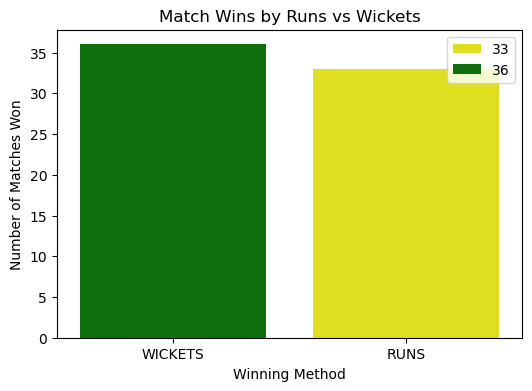

In [12]:
win_type_counts = df["Winning Margin Type"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=win_type_counts.index, y=win_type_counts.values, palette=["yellow", "green"],hue=win_type_counts.values)
plt.ylabel("Number of Matches Won")
plt.xlabel("Winning Method")
plt.title("Match Wins by Runs vs Wickets")
plt.show()


### 📊 Key Findings:
- **33** matches were won by **defending scores (runs)**, while **36** were won by **chasing (wickets)**.
____________________________________________________________________

## Venue Analysis 🏟️
### 🎯 Objective:
Understand which venues hosted the most matches.

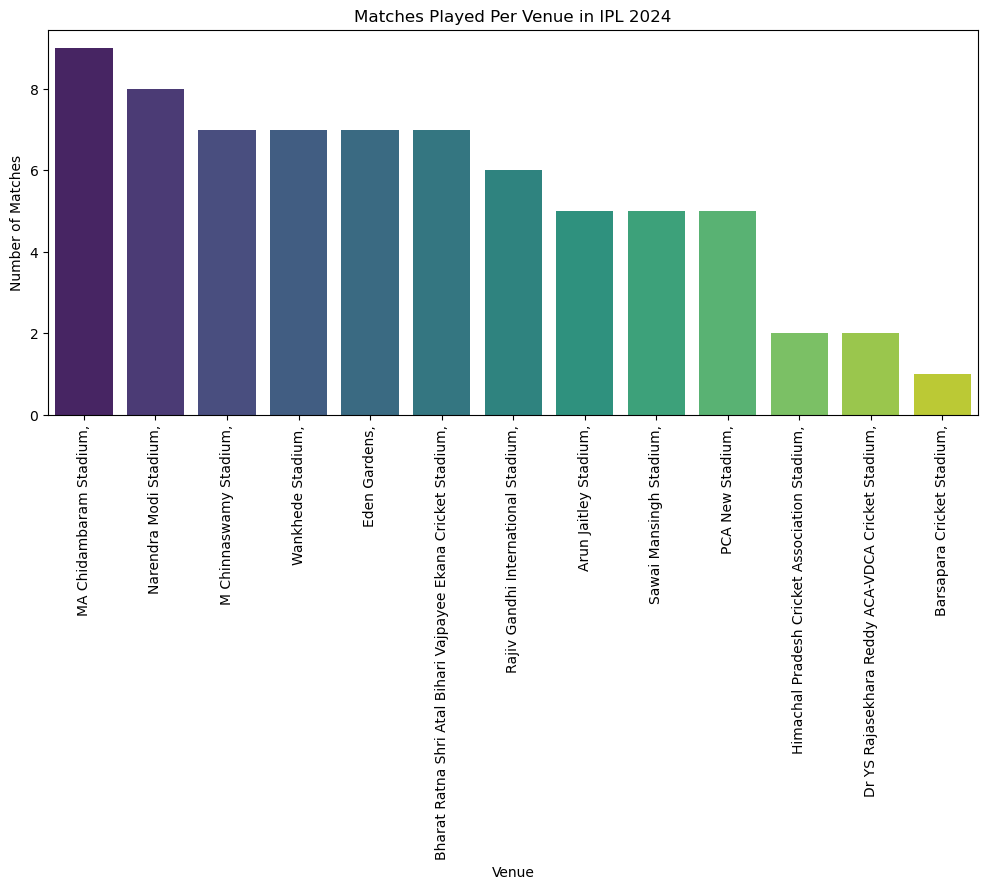

In [13]:
venue_counts = df["Venue"].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="viridis",hue=venue_counts.index)
plt.xticks(rotation=90)
plt.ylabel("Number of Matches")
plt.xlabel("Venue")
plt.title("Matches Played Per Venue in IPL 2024")
plt.show()

### 📊 Key Findings:
- The most frequently used venues were **MA Chidambaram Stadium,  and Narendra Modi Stadium**.
- Certain venues, like **Barsapara Cricket Stadium, Himachal Pradesh Cricket Association Stadium, and Dr YS Rajasekhara Reddy ACA-VDCA Cricket Stadium**, had least matches.
____________________________________________________________________

## Highest & Lowest Team Scores 📈
### 🎯 Objective:
Analyze the distribution of team scores in IPL 2024.

### Score Distribution

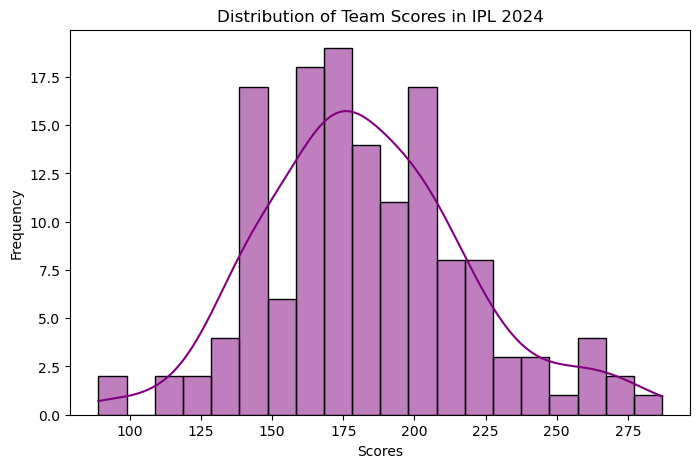

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(pd.concat([df["Team 1 Score"], df["Team 2 Score"]]), bins=20, kde=True, color="purple")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Team Scores in IPL 2024")
plt.show()

### 📊 Key Findings:
- The highest team score recorded was **277**, while the lowest was **89**.
- Most teams scored in the range of **160 to 200**, indicating a balanced competition.
____________________________________________________________________

## Trend of Highest Scores Over Time 📈

### 🎯 Objective:
Examine how high scores evolved throughout the season.

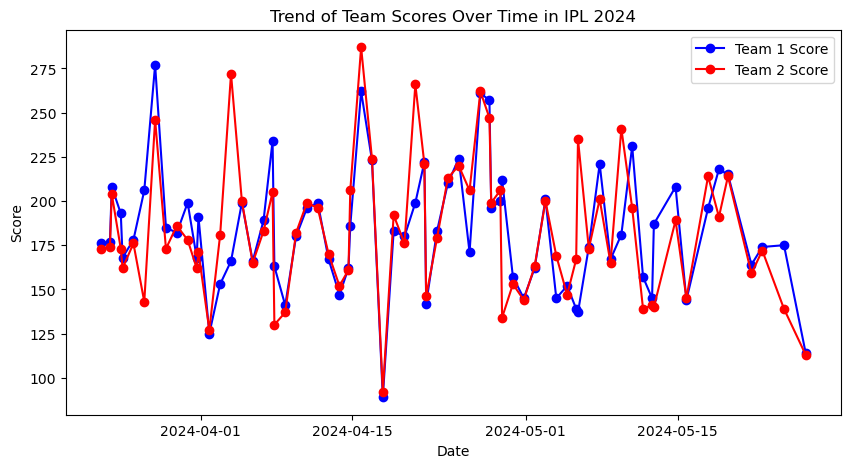

In [15]:
plt.figure(figsize=(10, 5))
df["Date & Time"] = pd.to_datetime(df["Date & Time"])
df_sorted = df.sort_values(by="Date & Time")

plt.plot(df_sorted["Date & Time"], df_sorted["Team 1 Score"], marker="o", linestyle="-", label="Team 1 Score", color="blue")
plt.plot(df_sorted["Date & Time"], df_sorted["Team 2 Score"], marker="o", linestyle="-", label="Team 2 Score", color="red")

plt.xlabel("Date")
plt.ylabel("Score")
plt.title("Trend of Team Scores Over Time in IPL 2024")
plt.legend()
plt.show()

### 📊 Key Findings:
- The highest team scores fluctuated over the season, with peak scores around **17th April, 2024**.
- **Higher scores in middle matches suggest better batting conditions in the middle of the tournament**.
- The Begining and Ending of the tournament had lower scores, indicates that there were close matches in the began and end.
____________________________________________________________________

## Match Outcomes Based on Batting First or Chasing ⚖️
### 🎯 Objective:
Analyze whether teams perform better when batting first or chasing.

### Match Wins by Batting First vs Chasing

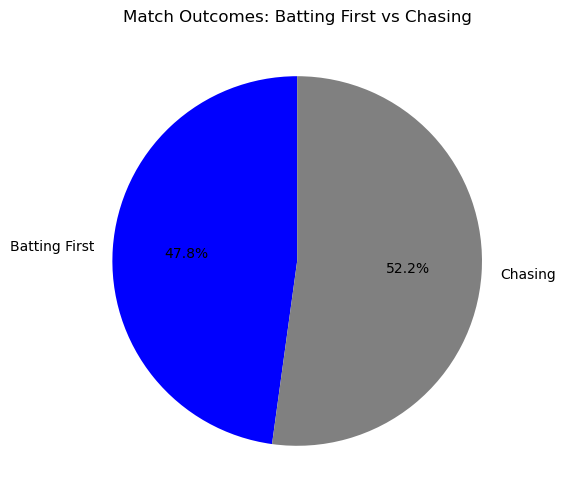

In [16]:
bat_first_wins = df[df["Winning Margin Type"] == "RUNS"].shape[0]
chasing_wins = df[df["Winning Margin Type"] == "WICKETS"].shape[0]

plt.figure(figsize=(6, 6))
plt.pie([bat_first_wins, chasing_wins], labels=["Batting First", "Chasing"], autopct="%1.1f%%", colors=["blue", "gray"], startangle=90)
plt.title("Match Outcomes: Batting First vs Chasing")
plt.show()

### 📊 Key Findings:
- **47.8% of matches** were won by teams **batting first**, while **52.2%** were won by teams **chasing**.
- This season showed a **clear trend that the matches were didn't affected that much by any of the choices**.
____________________________________________________________________

## Team-wise Win Strategy ⚖️

### 🎯 Objective:
Identify which teams preferred to defend their total or chase.

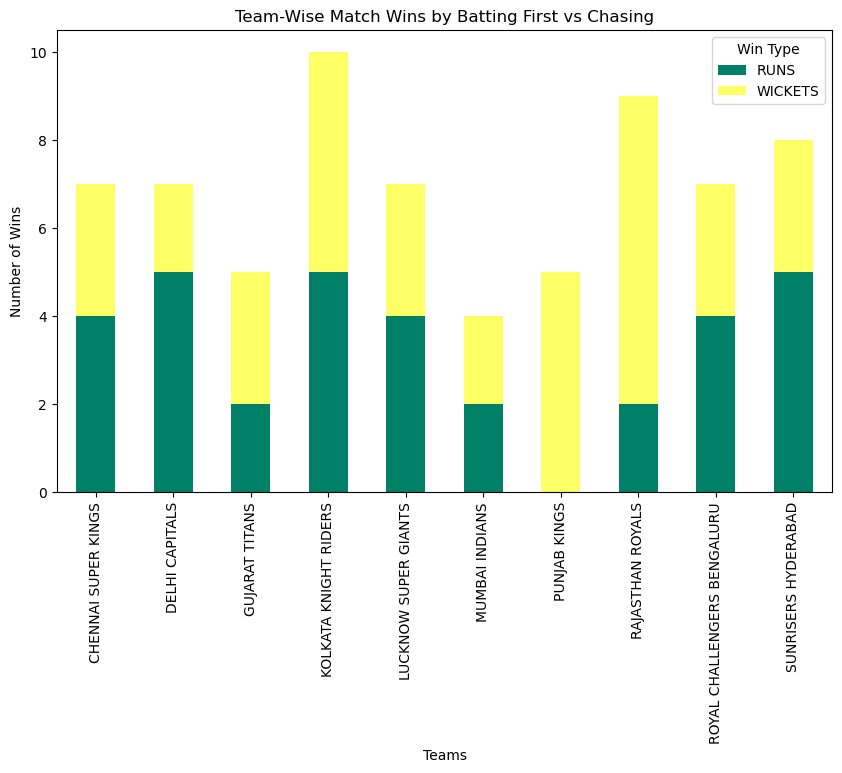

In [17]:
team_win_strategy = df.groupby(["winner", "Winning Margin Type"]).size().unstack()

team_win_strategy.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="summer")
plt.ylabel("Number of Wins")
plt.xlabel("Teams")
plt.title("Team-Wise Match Wins by Batting First vs Chasing")
plt.legend(title="Win Type")
plt.show()


### 📊 Key Findings:
- **KKR (Kolkata Knight Riders)** had the most wins **weather batting first or chasing**, while **PK (Punjab Kings)** performed better in chases.
- Some teams were **balanced**, winning equally with both strategies.
- **It was unexpected that the team PK (Punjab Kings) wins only by chasing**, this unexpected trend was observed.
____________________________________________________________________

## Winning Margin Distribution 📊

### 🎯 Objective:
Analyze the distribution of winning margins to understand whether matches were close or one-sided.

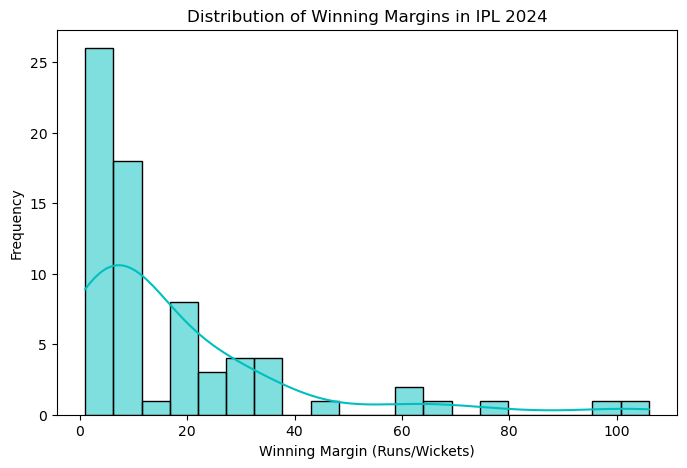

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Winning Margin Value"], bins=20, kde=True, color="c")
plt.xlabel("Winning Margin (Runs/Wickets)")
plt.ylabel("Frequency")
plt.title("Distribution of Winning Margins in IPL 2024")
plt.show()

### 📊 Key Findings:
- Most of the matches were close matches through out the IPL tournament.
____________________________________________________________________

## Average Winning Margins by Winning Type 📊

### 🎯 Objective:
Compare winning margins for matches won by runs vs wickets.

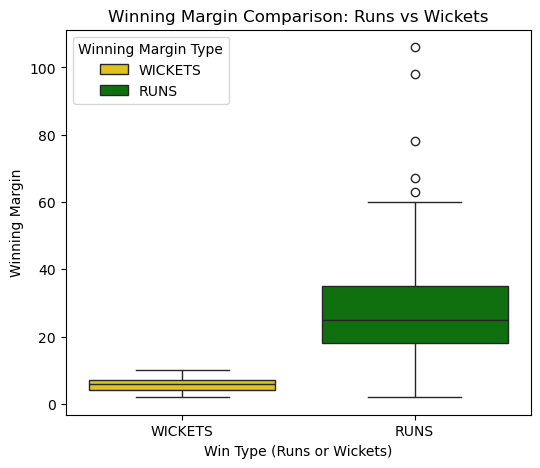

In [19]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df["Winning Margin Type"], y=df["Winning Margin Value"], palette=["gold", "green"],hue=df["Winning Margin Type"])
plt.xlabel("Win Type (Runs or Wickets)")
plt.ylabel("Winning Margin")
plt.title("Winning Margin Comparison: Runs vs Wickets")
plt.show()

### 📊 Key Findings:
- Certain teams won by **huge margins**, while others had **narrow escapes**.
- Outliers show **some teams won by exceptionally high margins**, indicating one-sided games.
____________________________________________________________________